# Files
So far, we have learned how to write programs and communicate our intentions to the Central Processing Unit using conditional execution, functions, and iterations. We have learned how to create and use data structures in the Main Memory. The CPU and memory are where our software works and runs. It is where all of the “thinking” happens.

But if you recall from our hardware architecture discussions, once the power is turned off, anything stored in either the CPU or main memory is erased. So up to now, our programs have just been transient fun exercises to learn Python.

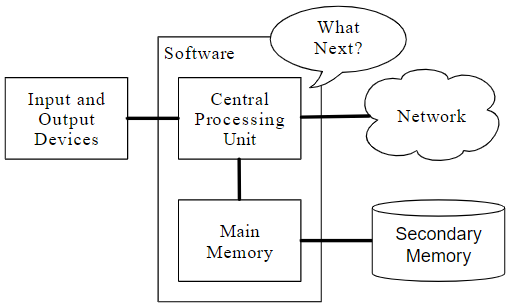

**Secondary Memory**

 Secondary memory is not erased when the power is turned off. Or in the case of a USB flash drive, the data we write from our programs can be removed from the system and transported to another system.

We will primarily focus on reading and writing text files such as those we create in a text editor. Later we will see how to work with database files which are binary files, specifically designed to be read and written through database software.

## Opening Files
When we want to read or write a file (say on your hard drive), we first must open the file. Opening the file communicates with your operating system, which knows where the data for each file is stored. When you open a file, you are asking the operating system to find the file by name and make sure the file exists.

In this example, we open the file *mbox.txt*

In [1]:
mbox = open('Text Files/mbox.txt')
print(mbox)

<_io.TextIOWrapper name='Text Files/mbox.txt' mode='r' encoding='UTF-8'>


If the `open` is successful, the operating system returns us a *file handle*. The file handle is not the actual data contained in the file, but instead it is a “handle” that we can use to read the data. You are given a handle if the requested file exists and you have the proper permissions to read the file.

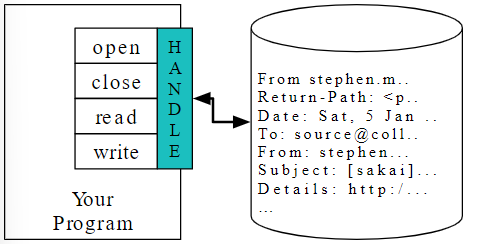

**A File Handle**

If the file does not exist, `open` will fail with a traceback and you will not get a handle to access the contents of the file:

In [2]:
mbox = open('mbox.txt')
print(mbox)


FileNotFoundError: [Errno 2] No such file or directory: 'mbox.txt'

Later we will use `try` and `except` to deal more gracefully with the situation where we attempt to open a file that does not exist.

## Text Files and Lines
A text file can be thought of as a sequence of lines, much like a Python string can be thought of as a sequence of characters. For example, *`mbox.txt`* is a sample of a text file which records mail activity from various individuals in an open source project development team, shortened version of the file is available as *`mbox-short`*. 

These files are in a standard format for a file containing multiple mail messages (*mbox format*). The lines which start with “`From`” separate the messages and the lines which start with “`From:`” are part of the messages.

To break the file into lines, there is a special character that represents the “end of the line” called the *newline character*. The newline character separates the characters in the file into lines. when we look at the lines in a file, we need to imagine that there is a special invisible character called the newline at the end of each line that marks the end of the line. In Python, we represent the newline character as a `\n` in string constants.

## Reading Files

While the *file handle* does not contain the data for the file, it is quite easy to construct a `for` loop to read through and count each of the lines in a file:


In [3]:
mbox_short = open('Text Files/mbox-short.txt')
count = 0

for line in mbox_short:
    count+=1
print(count)

mbox_short.close()




1910


We can use the file handle as the sequence in our `for` loop. Our `for` loop simply counts the number of lines in the file and prints them out. The rough translation of the `for` loop into English is, “for each line in the file represented by the file handle, add one to the `count` variable.”

The reason that the `open` function does not read the entire file is that the file might be quite large with many gigabytes of data. The `open` statement takes the same amount of time regardless of the size of the file. The `for` loop actually causes the data to be read from the file.

When the file is read using a `for` loop in this manner, Python takes care of splitting the data in the file into separate lines using the newline character. Python reads each line through the newline and includes the newline as the last character in the `line` variable for each iteration of the `for` loop.

Because the `for` loop reads the data one line at a time, it can efficiently read and count the lines in very large files without running out of main memory to store the data. The above program can count the lines in any size file using very little memory since each line is read, counted, and then discarded.

We used `close` method because when we are done with our resourse (file), we should close it.

If you know the file is relatively small compared to the size of your main memory, you can read the whole file into one string using the `read` method on the file handle.

In [4]:
mbox_short = open('Text Files/mbox-short.txt')
inp = mbox_short.read()
print(len(inp))

print(inp[:20])

mbox_short.close()


94626
From stephen.marquar


In this example, the entire contents (all 94,626 characters) of the file *`mbox-short.txt `* are read directly into the variable `inp`. We use string slicing to print out the first 20 characters of the string data stored in inp`.

When the file is read in this manner, all the characters including all of the lines and newline characters are one big string in the variable inp. It is a good idea to store the output of `read` as a variable because each call to `read` exhausts the resource:

In [5]:
mbox_short = open('Text Files/mbox-short.txt')
print(len(mbox_short.read()))
print(len(mbox_short.read()))
mbox_short.close()




94626
0


Remember that this form of the `open` function should only be used if the file data will fit comfortably in the main memory of your computer. If the file is too large to fit in main memory, you should write your program to read the file in chunks using a `for` or `while` loop.

## Searching through a File
When you are searching through data in a file, it is a very common pattern to read through a file, ignoring most of the lines and only processing lines which meet a particular condition. We can combine the pattern for reading a file with string methods to build simple search mechanisms.

For example, if we wanted to read a file and only print out lines which started with the prefix “`From:`”, we could use the string method *`startswith`* to select only those lines with the desired prefix:


In [6]:
mbox_short = open('Text Files/mbox-short.txt')
for line in mbox_short:
    if line.startswith("From:"):
        print(line)
mbox_short.close()

From: stephen.marquard@uct.ac.za

From: louis@media.berkeley.edu

From: zqian@umich.edu

From: rjlowe@iupui.edu

From: zqian@umich.edu

From: rjlowe@iupui.edu

From: cwen@iupui.edu

From: cwen@iupui.edu

From: gsilver@umich.edu

From: gsilver@umich.edu

From: zqian@umich.edu

From: gsilver@umich.edu

From: wagnermr@iupui.edu

From: zqian@umich.edu

From: antranig@caret.cam.ac.uk

From: gopal.ramasammycook@gmail.com

From: david.horwitz@uct.ac.za

From: david.horwitz@uct.ac.za

From: david.horwitz@uct.ac.za

From: david.horwitz@uct.ac.za

From: stephen.marquard@uct.ac.za

From: louis@media.berkeley.edu

From: louis@media.berkeley.edu

From: ray@media.berkeley.edu

From: cwen@iupui.edu

From: cwen@iupui.edu

From: cwen@iupui.edu



The output looks great since the only lines we are seeing are those which start with “`From:`”, but why are we seeing the extra blank lines? This is due to that invisible *newline* character. Each of the lines ends with a newline, so the `print` statement prints the string in the variable *`line`* which includes a newline and then `print` adds *another* newline, resulting in the double spacing effect we see.

We could use line slicing to print all but the last character, but a simpler approach is to use the *`rstrip`* method which strips whitespaces from the right side of a string as follows:

In [7]:
mbox_short = open('Text Files/mbox-short.txt')
for line in mbox_short:
    line = line.rstrip()
    if line.startswith("From:"):
        print(line)
        
mbox_short.close()

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


As your file processing programs get more complicated, you may want to structure your search loops using `continue`. The basic idea of the search loop is that you are looking for “interesting” lines and effectively skipping “uninteresting” lines. And then when we find an interesting line, we do something with that line.

We can structure the loop to follow the pattern of skipping uninteresting lines as follows:

In [8]:
mbox_short = open('Text Files/mbox-short.txt')
for line in mbox_short:
    line = line.rstrip()

    # Skip 'uninteresting lines'
    if not line.startswith("From:"):
        continue
    
    # Process our 'interesting' line
    print(line)
mbox_short.close()

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


The output of the program is the same. In English, the uninteresting lines are those which do not start with “`From:`”, which we skip using `continue`. For the “interesting” lines (i.e., those that start with “`From:`”) we perform the processing.

We can use the `find` string method to simulate a text editor search that finds lines where the search string is anywhere in the line. Since `find` looks for an occurrence of a string within another string and either returns the position of the string or -1 if the string was not found, we can write the following loop to show lines which contain the string “`@uct.ac.za`” (i.e., they come from the University of Cape Town in South Africa):

In [9]:
mbox_short = open('Text Files/mbox-short.txt')
for line in mbox_short:
    line = line.rstrip()
    if line.find('@uct.ac.za') == -1:
         continue
    print(line)
mbox_short.close()

From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
X-Authentication-Warning: nakamura.uits.iupui.edu: apache set sender to stephen.marquard@uct.ac.za using -f
From: stephen.marquard@uct.ac.za
Author: stephen.marquard@uct.ac.za
From david.horwitz@uct.ac.za Fri Jan  4 07:02:32 2008
X-Authentication-Warning: nakamura.uits.iupui.edu: apache set sender to david.horwitz@uct.ac.za using -f
From: david.horwitz@uct.ac.za
Author: david.horwitz@uct.ac.za
r39753 | david.horwitz@uct.ac.za | 2008-01-04 13:05:51 +0200 (Fri, 04 Jan 2008) | 1 line
From david.horwitz@uct.ac.za Fri Jan  4 06:08:27 2008
X-Authentication-Warning: nakamura.uits.iupui.edu: apache set sender to david.horwitz@uct.ac.za using -f
From: david.horwitz@uct.ac.za
Author: david.horwitz@uct.ac.za
From david.horwitz@uct.ac.za Fri Jan  4 04:49:08 2008
X-Authentication-Warning: nakamura.uits.iupui.edu: apache set sender to david.horwitz@uct.ac.za using -f
From: david.horwitz@uct.ac.za
Author: david.horwitz@uct.ac.za
From david.horw

## Letting the User Choose the File Name

We really do not want to have to edit our Python code every time we want to process a different file. It would be more usable to ask the user to enter the file name string each time the program runs so they can use our program on different files without changing the Python code.

This is quite simple to do by reading the file name from the user using `input` as follows:


In [10]:
fname = input('Enter the file path: ')
# Paste "Text Files/mbox-short.txt" in input field to open mbox-short
fhandle = open(fname)
count = 0
for line in fhandle:
    if line.startswith('Subject:'):
        count += 1
print('There were', count, 'subject lines in', fname.split('/')[-1])
fhandle.close()

There were 27 subject lines in mbox-short.txt


## Using `try`, `except`, and `open`

What if our user types something that is not a file name?

In [1]:
fname = input('Enter the file path: ')
# Enter something wrong in input field

fhandle = open(fname)
count = 0
for line in fhandle:
    if line.startswith('Subject:'):
        count += 1
print('There were', count, 'subject lines in', fname.split('/')[-1])
fhandle.close()

FileNotFoundError: [Errno 2] No such file or directory: 'kjdfkdgh'

So now that we see the flaw in the program, we can elegantly fix it using the `try`/`except` structure. We need to assume that the `open` call might fail and add recovery code when the open fails as follows:

In [1]:
fname = input('Enter the file name: ')
try:
    fhandle = open(fname)
    count = 0
    for line in fhandle:
        if line.startswith('Subject:'):
            count += 1
    print('There were', count, 'subject lines in', fname.split('/')[-1])
    fhandle.close()
except:
    print('File cannot be opened:', fname)

File cannot be opened: dgdsgsddfg


## Writing Files

To write a file, you have to open it with mode “`w`” as a second parameter:

In [1]:
fout = open('Text Files/output.txt', 'w')
print(fout)


<_io.TextIOWrapper name='6- Files/output.txt' mode='w' encoding='UTF-8'>


The `write` method of the file handle object puts data into the file, returning the number of characters written. The default write mode is text for writing (and reading) strings.

In [2]:
line1 = "This here's the wattle,\n"
fout.write(line1)

24

Again, the file object keeps track of where it is, so if you call `write` again, it adds the new data to the end.

We must make sure to manage the ends of lines as we write to the file by explicitly inserting the newline character when we want to end a line. The `print` statement automatically appends a newline, but the write method does not add the newline automatically.

In [3]:
line2 = 'the emblem of our land.\n'
fout.write(line2)

24

When you are done writing, you have to close the file to make sure that the last bit of data is physically written to the disk so it will not be lost if the power goes off.

In [ ]:
fout.close()

We could close the files which we open for read as well, but we can be a little sloppy if we are only opening a few files since Python makes sure that all open files are closed when the program ends. When we are writing files, we want to explicitly close the files so as to leave nothing to chance.